Here we review the optimizers used in machine learning. 
# Gradient Descent

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Data
Let's use a simple dataset of salaries from developers and machine learning engineers in five Chinese cities in 2019

In [2]:

# developer salary in Beijing, Shanghai, Hangzhou, Shenzhen and Guangzhou in 2019
x = [13854,12213,11009,10655,9503] 
x = np.reshape(x,newshape=(5,1)) / 10000.0

# Machine Learning Engineer in the five cities.
y =  [21332, 20162, 19138, 18621, 18016] 
y = np.reshape(y,newshape=(5,1)) / 10000.0

## Functions
Objective Function:
$$y=ax+b+ε$$
Cost Function:
$$J(a,b)=\frac{1}{2n}\sum_{i=0}^{n}(y_i−\hat{y}_i )^2$$
Optimization Function or optimizer:
$$\theta = \theta - \alpha \frac{\partial J}{\partial \theta}$$
Here in the univariate linear regression:
$$a = a - \alpha \frac{\partial J}{\partial a}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$

Here $\frac{\partial J}{\partial a}$ and $\frac{\partial J}{\partial b}$ are:

$$ \frac{\partial J}{\partial a} = \frac{1}{n}\sum_{i=0}^{n}x(\hat{y}_i-y_i)$$


$$ \frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=0}^{n}(\hat{y}_i-y_i)$$

In [3]:
def model(a, b, x):
    return a*x + b

def cost_function(a, b, x, y):
    n = 5
    return 0.5/n * (np.square(y-a*x-b)).sum()

def sgd(a,b,x,y):
    n = 5
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    a = a - alpha*da
    b = b - alpha*db
    return a, b


In [4]:
def iterate_sgd(a,b,x,y,times):
    for i in range(times):
        a,b = sgd(a,b,x,y)

    y_hat=model(a,b,x)
    cost = cost_function(a, b, x, y)
    print(a,b,cost)
    plt.scatter(x,y)
    plt.plot(x,y_hat)
    plt.show()
    return a,b, cost

0.950768563083351 0.8552812669346652 0.00035532090622957674


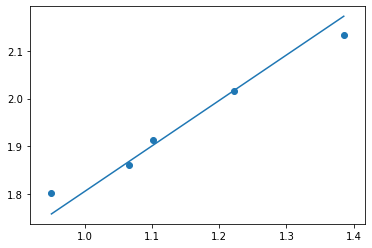

In [5]:
a=0
b=0
_, _, sgd_cost = iterate_sgd(a,b,x,y,100)

In [6]:
sgd_cost

0.00035532090622957674

After 100 iterations, the regression is almost done. We record the cost such that in the following exploration of other optimizers, we will be able to compare iterations to reach the same cost.

In [7]:
def iterate(a, b, x, y, target_cost, func):
    i=0
    for i in range(1000):
        a,b = func(a,b,x,y)
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

This is just a small test see if it works reversely.

In [8]:
iterate(a,b,x,y, sgd_cost, sgd)

100

# Momentum
Momentum was proposed by Boris Polyak in 1964. Compared to SGD, it adds another term to the parameter $\theta$. This term is momentum, denoted as $m$. It takes previous momentum, multiplied by $\beta$. When the derivate is in one direction, the momentum gets larger and larger and the optimum is reached sooner. While the derivative direction is changed, the momentum gets smaller, but it gets larger again when the direction is fixed.

$$ m = \beta m - \alpha \frac{\partial J}{\partial \theta}$$

$$ \theta = \theta + m $$

In [9]:
def momentum(a, b, ma, mb, x, y):
    n = 5
    alpha = 1e-1
    beta = 0.9
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    ma = beta*ma - alpha*da
    mb = beta*mb - alpha*db
    a = a + ma
    b = b + mb
    return a, b, ma, mb

In [10]:
def iterate_momentum(x, y, target_cost):
    a=0
    b=0
    ma=0
    mb=0
    for i in range(1000):
        a, b, ma, mb = momentum(a,b, ma, mb, x,y)
        print(f"{ma}\t{mb}")
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

In [11]:
iterate_momentum(x, y, target_cost=sgd_cost)

0.22441501579999998	0.19453800000000002
0.37422247273264564	0.32448006197140566
0.42205082627737606	0.3661434135397697
0.3669569357577927	0.31871477461500164
0.23200196838148313	0.2021526955988872
0.056494030025446756	0.050474753607803874
-0.11476727348134302	-0.09754962817390435
-0.24244627038078237	-0.20787942869918896
-0.3012619304723101	-0.25863596662407884
-0.28445487409046366	-0.24396840343676746
-0.20350545891969496	-0.17380977569712325
-0.08364332123714681	-0.0699911702901115
0.04338773008400103	0.040019175300583965
0.147354432709795	0.13006006211489604
0.20640546147925654	0.1812234868328625
0.21130873793163232	0.1855214000311385
0.16633382496141397	0.146649293292915
0.08690993480643269	0.0779595676235392
-0.00507401470797135	-0.0016055486586756679
-0.08699979992056481	-0.07247278613120942
-0.1408466468646064	-0.11904732814606164
-0.15691741066134915	-0.13293724917152472
-0.1352587212815897	-0.1141824310137057
-0.08467582859413841	-0.07040205626263701
-0.01981150872173977	-0.01

46

Voila, we achieve the same cost in just 46 iterations.

# Nesterov Accelerated Gradient
One small variant to momentum optimization, proposed by Yurii Nesterov in
1983, is almost always faster than vanilla momentum optimization. The
Nesterov Accelerated Gradient (NAG) method, also known as Nesterov
momentum optimization, measures the gradient of the cost function not at the
local position θ but slightly ahead in the direction of the momentum, at θ + βm
.

Function:
$$ m = \beta m - \alpha \frac{\partial J(\theta+\beta m)}{\partial \theta}$$

$$ \theta = \theta + m $$

![Nesterov](images/nesterov.png)

For linear regression:

$$ \frac{\partial J}{\partial a} = \frac{1}{n}\sum_{i=0}^{n}x(\hat{y}_i-y_i)$$

$$ \frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=0}^{n}(\hat{y}_i-y_i)$$
Here:
$$\hat{y}=(a+m_a)x+(b+m_b)$$

In [12]:
def nesterov(a, b, ma, mb, x, y):
    n = 5
    alpha = 1e-1
    beta = 0.9
    y_hat = model(a+ma,b+mb,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    ma = beta*ma - alpha*da
    mb = beta*mb - alpha*db
    a = a + ma
    b = b + mb
    return a, b, ma, mb

In [13]:
def iterate_nesterov(x, y, target_cost):
    a=0
    b=0
    ma=0
    mb=0
    for i in range(1000):
        a, b, ma, mb = nesterov(a,b, ma, mb, x,y)
        print(ma, mb)
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

In [14]:
iterate_nesterov(x, y, target_cost=sgd_cost)

0.22441501579999998 0.19453800000000002
0.3220564154452913 0.2793379239428112
0.3123373193267518 0.2712021012049902
0.23316116137430112 0.2029331301200368
0.12597323633919164 0.11039828486837797
0.02495663925447264 0.02318026316585743
-0.04849493913806344 -0.0402057492598321
-0.08649709799457425 -0.07293501030570788
-0.09201745463834532 -0.07757373717860767
-0.0745806082761438 -0.062362386777225415
-0.04587718632305795 -0.03741593563963194
-0.016328775542062378 -0.011751334705692
0.006910985026297077 0.008442254305498949
0.020532049949227454 0.020301604537172682
0.024559560846665853 0.02384948551560824
0.02123968741689477 0.021030536818391725
0.013779790759404111 0.014621078911301263
0.005283948295620864 0.0073079790564409405
-0.001933819282152938 0.0010943603685497844
-0.006624599047500719 -0.0029384067739360196
-0.008540833610722172 -0.004575531028581929
-0.008161152003470043 -0.004230677649705485


21

Well, it took 21 iterations.

# AdaGrad

Consider the elongated bowl problem again: Gradient Descent starts by quickly
going down the steepest slope, which does not point straight toward the global
optimum, then it very slowly goes down to the bottom of the valley. It would be
nice if the algorithm could correct its direction earlier to point a bit more toward
the global optimum. The AdaGrad algorithm achieves this correction by
scaling down the gradient vector along the steepest dimensions.

$$\epsilon=1e-10$$
$$ s = s + \frac{\partial J}{\partial \theta} \odot \frac{\partial J}{\partial \theta} $$
$$ \theta = \theta - \alpha \frac{\partial J}{\partial \theta} \oslash \sqrt{s+\epsilon} $$

![AdaGrad](images/adaGrad.png)

In [59]:
def ada_grad(a,b,sa, sb, x,y):
    epsilon=1e-10
    n = 5
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    sa=sa+da*da + epsilon
    sb=sb+db*db + epsilon
    a = a - alpha*da / np.sqrt(sa)
    b = b - alpha*db / np.sqrt(sb)
    return a, b, sa, sb

In [62]:
def iterate_ada_grad(x, y, target_cost):
    a=0
    b=0
    sa=0
    sb=0
    for i in range(1000):
        a, b, sa, sb = ada_grad(a,b, sa, sb, x,y)
        print(f"{sa}\t{sb}")
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

In [63]:
iterate_ada_grad(x, y, target_cost=sgd_cost)

5.036209931751423 3.7845033445000005
9.022051275308753 6.780559696352509
12.37760305876143 9.303433839935428
15.277271622803307 11.48402050624463
17.82104257560732 13.397362865404352
20.075029302440374 15.093083234334934
22.086658442962953 16.606779524600782
23.891795301524446 17.965372780402355
25.518582625798217 19.189988154097705
26.989713284113275 20.297660542873828
28.323871617739783 21.30241632396213
29.536696895192907 22.215996430588216
30.641454625769647 23.048360177403552
31.64952032868011 23.808048334075067
32.570737998208436 24.502452158091806
33.41369201864302 25.138017471314626
34.1859175911238 25.72040258936349
34.89406641053884 26.254602665813465
35.5440390853296 26.745049076615274
36.14109238402617 27.195689911681644
36.68992711613361 27.610055932293786
37.19476089865728 27.991315184952946
37.65938897276373 28.342318646661948
38.08723546173832 28.665638696230218
38.48139690171807 28.96360178615045
38.84467946537304 29.238316380907396
39.179630992211976 29.49169699755010

114

As we can see that AdaGrad is slower even than SGD. 

# RMSProp

As we’ve seen, AdaGrad runs the risk of slowing down a bit too fast and never
converging to the global optimum. The RMSProp algorithm fixes this by
accumulating only the gradients from the most recent iterations (as opposed to
all the gradients since the beginning of training). It does so by using exponential
decay in the first step.


$$\epsilon=1e-10$$
$$ s = \beta s + (1-\beta) \frac{\partial J}{\partial \theta} \odot \frac{\partial J}{\partial \theta} $$
$$ \theta = \theta - \alpha \frac{\partial J}{\partial \theta} \oslash \sqrt{s+\epsilon} $$

In [70]:
def rmsprop(a,b,sa, sb, x,y):
    epsilon=1e-10
    beta = 0.9
    n = 5
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    sa=beta*sa+(1-beta)*da*da + epsilon
    sb=beta*sb+(1-beta)*db*db + epsilon
    a = a - alpha*da / np.sqrt(sa)
    b = b - alpha*db / np.sqrt(sb)
    return a, b, sa, sb

In [71]:
def iterate_rmsprop(x, y, target_cost):
    a=0
    b=0
    sa=0
    sb=0
    for i in range(1000):
        a, b, sa, sb = rmsprop(a,b, sa, sb, x,y)
        print(sa, sb)
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

In [72]:
iterate_rmsprop(x, y, target_cost=sgd_cost)

0.5036209932651422 0.37845033453999993
0.6666748340963962 0.5011779498389735
0.7035624038659631 0.5290949609920477
0.6846116014928423 0.5150052874480152
0.6413660413519212 0.48260564824209634
0.5892427995404017 0.44348725811529754
0.5358164308595106 0.40335218230125897
0.48463120243995755 0.3648742872141607
0.4371551733415317 0.32916597779828294
0.39382062269916923 0.2965594306913857
0.3545748318305831 0.26702044359109756
0.3191617858943141 0.24036036007818096


11

Wa, that is only 11 times. 

# Adam

Adam, which stands for adaptive moment estimation, combines the ideas of
momentum optimization and RMSProp. 


$$ m = \beta_1 m - (1-\beta_1)\frac{\partial J}{\partial \theta}$$
$$ s = \beta_2 s + (1-\beta_2) \frac{\partial J}{\partial \theta} \odot \frac{\partial J}{\partial \theta} $$
$$ \hat{m} = \frac{m}{1-\beta_1^T} $$
$$ \hat{s} = \frac{s}{1-\beta_2^T} $$
$$ \theta = \theta + \alpha \hat{m} \oslash \sqrt{\hat{s}+\epsilon} $$ 

In [77]:
def adam(a, b, ma, mb, sa, sb, t, x, y):
    epsilon=1e-10
    beta1 = 0.9
    beta2 = 0.9
    n = 5
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    ma = beta1 * ma - (1-beta1)*da
    mb = beta1 * mb - (1-beta1)*db
    sa = beta2 * sa + (1-beta2)*da*da
    sb = beta2 * sb + (1-beta2)*db*db
    ma_hat = ma/(1-beta1**t)
    mb_hat = mb/(1-beta1**t)
    sa_hat=sa/(1-beta2**t)
    sb_hat=sb/(1-beta2**t)
    
    a = a + alpha*ma_hat / np.sqrt(sa_hat)
    b = b + alpha*mb_hat / np.sqrt(sb_hat)
    
    return a, b, ma, mb, sa, sb

In [86]:
def iterate_adam(x, y, target_cost):
    a=0
    b=0
    ma=0
    mb=0
    sa=0
    sb=0
    for i in range(1000):
        a, b, ma, mb, sa, sb = adam(a,b, ma, mb, sa, sb, i+1, x, y)
        print(f"{ma}\t{mb}\t{sa}\t{sb}")
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

In [87]:
iterate_adam(x, y, target_cost=sgd_cost)

0.22441501579999992	0.19453799999999996	0.5036209931651422	0.3784503344399999
0.4016192340199999	0.3481753999999999	0.8518430281932292	0.6402109361703999
0.5363759738971576	0.46503883320196493	1.07262411300758	0.8062610188683121
0.6330149656607605	0.5488792785222582	1.1911922341823753	0.895531357068881
0.6954922736152254	0.603123968069419	1.2302760874303023	0.925077503166402
0.7274510180595801	0.6309289839343443	1.2102871620886997	0.9102165370096031
0.7322854961686895	0.6352347958137915	1.1494443580778129	0.8646207447731215
0.7132116293046631	0.6188272743886445	1.0638272189106417	0.8003578054256075
0.6733462945505432	0.5844063952845583	0.9673391882821758	0.7278635560226704
0.6157957995957747	0.5346628581915572	0.8715625623331551	0.6558335963281313
0.5437474965633194	0.4723574225921566	0.7855022477276057	0.5910315423836943
0.4605465905355612	0.4003874237356603	0.7152614958663444	0.5380462226395261
0.369725397655793	0.3218121173778424	0.6637757717878439	0.49909226801269685
0.274947831152

25

25 times

# NAdam

Adam, which stands for adaptive moment estimation, combines the ideas of
momentum optimization and RMSProp. 


$$ m = \beta_1 m - (1-\beta_1)\frac{\partial J(\theta+\beta_1 m)}{\partial \theta}$$
$$ s = \beta_2 s + (1-\beta_2) \frac{\partial J(\theta+\beta_1 m)}{\partial \theta} \odot \frac{\partial J(\theta+\beta_1 m)}{\partial \theta} $$
$$ \hat{m} = \frac{m}{1-\beta_1^T} $$
$$ \hat{s} = \frac{s}{1-\beta_2^T} $$
$$ \theta = \theta + \alpha \hat{m} \oslash \sqrt{\hat{s}+\epsilon} $$ 

In [15]:
def nadam(a, b, ma, mb, sa, sb, t, x, y):
    epsilon=1e-10
    beta1 = 0.9
    beta2 = 0.9
    n = 5
    alpha = 1e-1
    # to modify adam to nadam, 
    # we only modify here
    # with a = a + ma 
    # and b = b + mb
    y_hat = model(a+ma,b+mb,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    ma = beta1 * ma - (1-beta1)*da
    mb = beta1 * mb - (1-beta1)*db
    sa = beta2 * sa + (1-beta2)*da*da
    sb = beta2 * sb + (1-beta2)*db*db
    ma_hat = ma/(1-beta1**t)
    mb_hat = mb/(1-beta1**t)
    sa_hat=sa/(1-beta2**t)
    sb_hat=sb/(1-beta2**t)
    
    a = a + alpha*ma_hat / np.sqrt(sa_hat)
    b = b + alpha*mb_hat / np.sqrt(sb_hat)
    
    return a, b, ma, mb, sa, sb

In [18]:
def iterate_nadam(x, y, target_cost):
    a=0
    b=0
    ma=0
    mb=0
    sa=0
    sb=0
    for i in range(1000):
        a, b, ma, mb, sa, sb = nadam(a,b, ma, mb, sa, sb, i+1, x, y)
        print(f"{ma}\t{mb}\t{sa}\t{sb}")
        cost = cost_function(a, b, x, y)
        if cost<target_cost:
            break
    return i

In [19]:
iterate_nadam(x, y, target_cost=sgd_cost)

0.22441501579999992	0.19453799999999996	0.5036209931651422	0.3784503344399999
0.34945317673264553	0.30303326197140557	0.6707614023970666	0.5043149255896258
0.4086630974407369	0.3545220463126516	0.6923373513038595	0.5207829264938997
0.42479852013231584	0.36869895522307994	0.655595591180131	0.4933351229538528
0.41338276013846714	0.3590014409177542	0.5996858101920048	0.45138499366847756
0.3850680115669883	0.33465143621864796	0.5414133518432255	0.40758055150153066
0.34719317806152206	0.30200342133598246	0.487276010490025	0.36682917334514187
0.3048126007276661	0.26543462733685447	0.43913535841653084	0.3305518278022634
0.2613794636593488	0.22793641452525237	0.3968993337519565	0.2986967105147332
0.21920663475537913	0.19151305757275972	0.35978057495684657	0.2706847309093604
0.17978502825765205	0.15745724253108329	0.32686534752782104	0.24583770178851216
0.1440100206019037	0.12654600408884117	0.29734596861667506	0.22355385981586914
0.11234680538118677	0.09918382962474853	0.27059121178700213	0.20

14

well, it takes only 14 times.